Fire the system

# PART 1. Data Pre-processing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from numpy import array
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import split
from numpy import mean
from numpy import std
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from keras import Input, Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Read the data

In [2]:
# download the dataset
from google.colab import drive
drive.mount("/content/drive")
# load the the file
df = pd.read_excel('/content/drive/My Drive/Thesis/Brazil.xlsx',sheet_name='Brazil_Bulk')

Mounted at /content/drive


Data pre-processing

In [3]:
df.head(5)

,Date,Volume,Gross_Weight,Day_dif,Day,Week_Number,Months,Year,Season,Unnamed: 9,Date.1,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2021-01-04,4.972,912.4,0,måndag,1.000000,1,2021,winter,NaN,2021.01.04,1,4,4,0.571429,NaN,1.0,31.0,31.0
1,2021-01-05,9.964,1463.5,1,tisdag,1.000000,1,2021,winter,NaN,2021.01.05,1,5,5,0.714286,NaN,2.0,28.0,59.0
2,2021-01-07,9.212,1964.4,2,torsdag,1.000000,1,2021,winter,NaN,2021.01.07,1,7,7,1.000000,NaN,3.0,31.0,90.0
3,2021-01-08,2.510,400.7,1,fredag,1.142857,1,2021,winter,NaN,2021.01.08,1,8,8,1.142857,NaN,4.0,30.0,120.0
4,2021-01-11,2.484,496.2,3,måndag,1.571429,1,2021,winter,NaN,2021.01.11,1,11,11,1.571429,NaN,5.0,31.0,151.0


In [4]:
# Encode the 'Season' column which contains categorical data using pandas.factorize()
df['Year_encoded'] = pd.factorize(df['Year'])[0]
df['Season_encoded'] = pd.factorize(df['Season'])[0]
df['Day_encoded'] = pd.factorize(df['Day'])[0]

In [5]:
df.head(5)

,Date,Volume,Gross_Weight,Day_dif,Day,Week_Number,Months,Year,Season,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Year_encoded,Season_encoded,Day_encoded
0,2021-01-04,4.972,912.4,0,måndag,1.000000,1,2021,winter,NaN,...,4,4,0.571429,NaN,1.0,31.0,31.0,0,0,0
1,2021-01-05,9.964,1463.5,1,tisdag,1.000000,1,2021,winter,NaN,...,5,5,0.714286,NaN,2.0,28.0,59.0,0,0,1
2,2021-01-07,9.212,1964.4,2,torsdag,1.000000,1,2021,winter,NaN,...,7,7,1.000000,NaN,3.0,31.0,90.0,0,0,2
3,2021-01-08,2.510,400.7,1,fredag,1.142857,1,2021,winter,NaN,...,8,8,1.142857,NaN,4.0,30.0,120.0,0,0,3
4,2021-01-11,2.484,496.2,3,måndag,1.571429,1,2021,winter,NaN,...,11,11,1.571429,NaN,5.0,31.0,151.0,0,0,0


In [6]:
# Drop the 'Year', 'Season' and 'Day' columns since we have encoded columns
df=df.drop(['Year','Season','Day'], axis=1)
df.head(5)

,Date,Volume,Gross_Weight,Day_dif,Week_Number,Months,Unnamed: 9,Date.1,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Year_encoded,Season_encoded,Day_encoded
0,2021-01-04,4.972,912.4,0,1.000000,1,NaN,2021.01.04,1,4,4,0.571429,NaN,1.0,31.0,31.0,0,0,0
1,2021-01-05,9.964,1463.5,1,1.000000,1,NaN,2021.01.05,1,5,5,0.714286,NaN,2.0,28.0,59.0,0,0,1
2,2021-01-07,9.212,1964.4,2,1.000000,1,NaN,2021.01.07,1,7,7,1.000000,NaN,3.0,31.0,90.0,0,0,2
3,2021-01-08,2.510,400.7,1,1.142857,1,NaN,2021.01.08,1,8,8,1.142857,NaN,4.0,30.0,120.0,0,0,3
4,2021-01-11,2.484,496.2,3,1.571429,1,NaN,2021.01.11,1,11,11,1.571429,NaN,5.0,31.0,151.0,0,0,0


In [7]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            505 non-null    object 
 1   Volume          505 non-null    float64
 2   Gross_Weight    505 non-null    float64
 3   Day_dif         505 non-null    int64  
 4   Week_Number     505 non-null    float64
 5   Months          505 non-null    int64  
 6   Unnamed: 9      0 non-null      float64
 7   Date.1          505 non-null    object 
 8   Unnamed: 11     505 non-null    int64  
 9   Unnamed: 12     505 non-null    int64  
 10  Unnamed: 13     505 non-null    int64  
 11  Unnamed: 14     505 non-null    float64
 12  Unnamed: 15     0 non-null      float64
 13  Unnamed: 16     12 non-null     float64
 14  Unnamed: 17     12 non-null     float64
 15  Unnamed: 18     12 non-null     float64
 16  Year_encoded    505 non-null    int64  
 17  Season_encoded  505 non-null    int

In [8]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            505 non-null    object 
 1   Volume          505 non-null    float64
 2   Gross_Weight    505 non-null    float64
 3   Day_dif         505 non-null    int64  
 4   Week_Number     505 non-null    float64
 5   Months          505 non-null    int64  
 6   Unnamed: 9      0 non-null      float64
 7   Date.1          505 non-null    object 
 8   Unnamed: 11     505 non-null    int64  
 9   Unnamed: 12     505 non-null    int64  
 10  Unnamed: 13     505 non-null    int64  
 11  Unnamed: 14     505 non-null    float64
 12  Unnamed: 15     0 non-null      float64
 13  Unnamed: 16     12 non-null     float64
 14  Unnamed: 17     12 non-null     float64
 15  Unnamed: 18     12 non-null     float64
 16  Year_encoded    505 non-null    int64  
 17  Season_encoded  505 non-null    int

In [9]:
print("Rows", df.shape[0])
print("Columns", df.shape[1])
print("Features", df.columns.tolist())
print("Missing values", df.isnull().any())

Rows 505
Columns 19
Features ['Date', 'Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Unnamed: 9', 'Date.1', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Year_encoded', 'Season_encoded', 'Day_encoded']
Missing values Date              False
Volume            False
Gross_Weight      False
Day_dif           False
Week_Number       False
Months            False
Unnamed: 9         True
Date.1            False
Unnamed: 11       False
Unnamed: 12       False
Unnamed: 13       False
Unnamed: 14       False
Unnamed: 15        True
Unnamed: 16        True
Unnamed: 17        True
Unnamed: 18        True
Year_encoded      False
Season_encoded    False
Day_encoded       False
dtype: bool


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

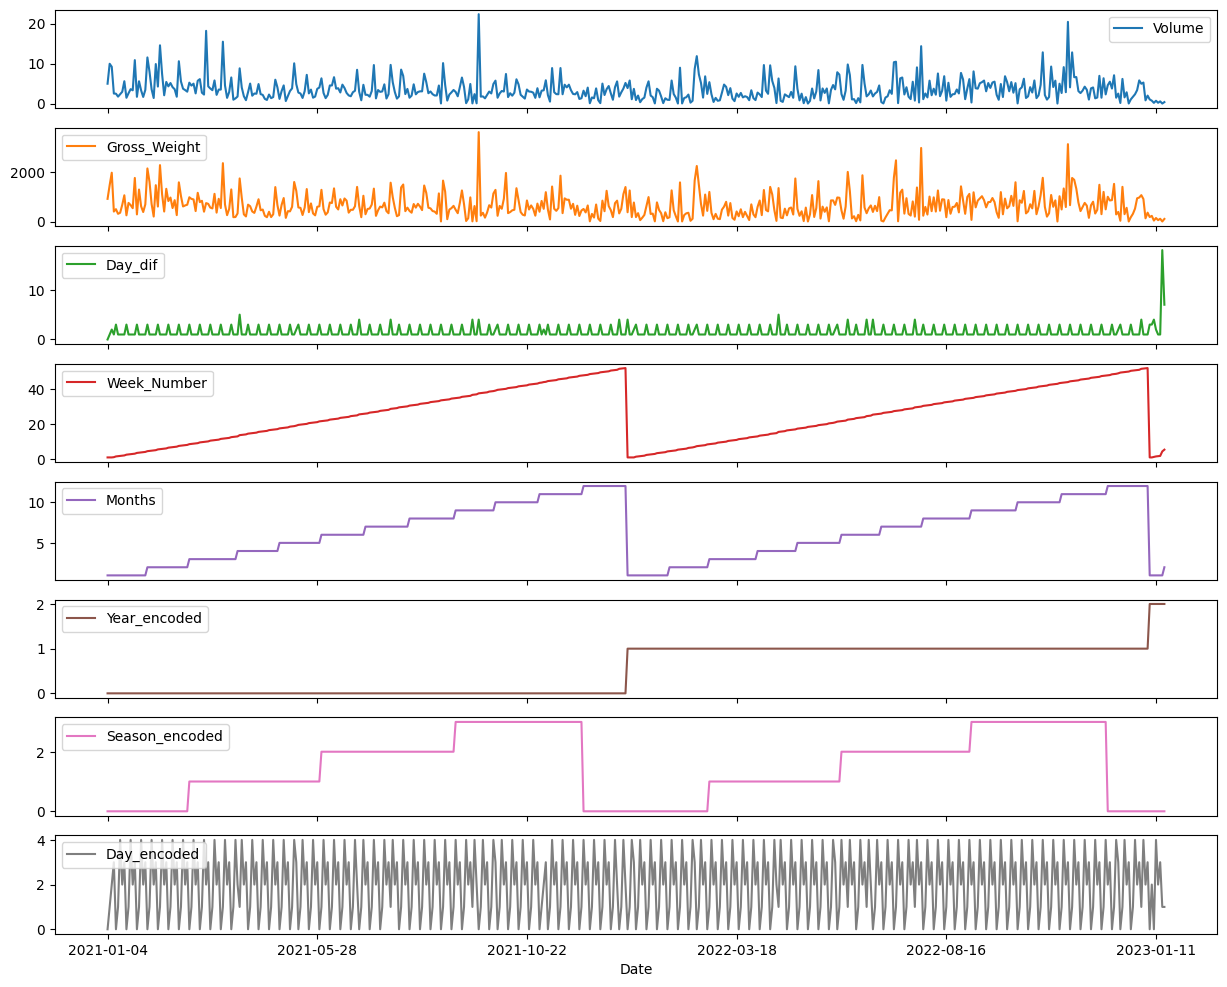

In [10]:
# Create a plot for each of variables
df.set_index('Date')[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].plot(subplots=True,figsize=(15, 12))

In [11]:
# All variables will be my input
df_input=df[['Date','Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]


In [12]:
df_input.head(5)

,Date,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
0,2021-01-04,4.972,912.4,0,1.000000,1,0,0,0
1,2021-01-05,9.964,1463.5,1,1.000000,1,0,0,1
2,2021-01-07,9.212,1964.4,2,1.000000,1,0,0,2
3,2021-01-08,2.510,400.7,1,1.142857,1,0,0,3
4,2021-01-11,2.484,496.2,3,1.571429,1,0,0,0


In [13]:
df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].describe()

,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.553109,652.607945,1.512871,25.877511,6.467327,0.524752,1.497030,2.003960
std,2.904566,499.337852,1.187038,15.177787,3.480020,0.530687,1.120025,1.414208
min,0.006000,0.280000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.638000,308.000000,1.000000,12.571429,3.000000,0.000000,0.000000,1.000000
50%,2.848000,542.100000,1.000000,26.000000,7.000000,1.000000,1.000000,2.000000
75%,4.736000,884.360000,1.000000,39.000000,9.000000,1.000000,2.000000,3.000000
max,22.377000,3597.520000,18.000000,52.000000,12.000000,2.000000,3.000000,4.000000


In [14]:
# Remove the outliers from the dataset
# Calculate the first and third quartiles
q1 = df_input['Volume'].quantile(0.25)
q3 = df_input['Volume'].quantile(0.75)

# Calculate the interquartile range
iqr = q3 - q1

# Determine the upper and lower limits for outliers
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

df_input = df_input[(df_input['Volume'] >= lower_limit) & (df_input['Volume'] <= upper_limit)]


In [15]:
df_input

,Date,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
0,2021-01-04,4.972,912.4,0,1.000000,1,0,0,0
2,2021-01-07,9.212,1964.4,2,1.000000,1,0,0,2
3,2021-01-08,2.510,400.7,1,1.142857,1,0,0,3
4,2021-01-11,2.484,496.2,3,1.571429,1,0,0,0
5,2021-01-12,1.735,309.7,1,1.714286,1,0,0,1
...,...,...,...,...,...,...,...,...,...
500,2023-01-11,0.705,141.1,2,1.571429,1,2,0,4
501,2023-01-12,0.201,55.0,1,1.714286,1,2,0,2
502,2023-01-13,0.553,111.0,1,1.857143,1,2,0,3
503,2023-01-31,0.006,1.0,18,4.428571,1,2,0,1


In [16]:
# Outliers are eliminated
df_input.describe()

,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,3.117189,589.434534,1.498960,26.146124,6.525988,0.528067,1.503119,2.020790
std,2.056648,397.384322,1.186951,15.207836,3.488053,0.532038,1.121982,1.411111
min,0.006000,0.280000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.596000,293.500000,1.000000,12.714286,3.000000,0.000000,1.000000,1.000000
50%,2.723000,522.000000,1.000000,26.142857,7.000000,1.000000,1.000000,2.000000
75%,4.230000,840.500000,1.000000,39.571429,10.000000,1.000000,3.000000,3.000000
max,9.335000,1964.400000,18.000000,52.000000,12.000000,2.000000,3.000000,4.000000


In [17]:
aq_corr=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].corr(method='pearson')
aq_corr

,Volume,Gross_Weight,Day_dif,Week_Number,Months,Year_encoded,Season_encoded,Day_encoded
Volume,1.000000,0.931069,-0.115557,0.082626,0.080718,-0.094720,0.093724,0.099849
Gross_Weight,0.931069,1.000000,-0.120329,0.112636,0.111215,-0.120112,0.102932,0.099715
Day_dif,-0.115557,-0.120329,1.000000,-0.065003,-0.069561,0.139429,-0.068439,-0.512449
Week_Number,0.082626,0.112636,-0.065003,1.000000,0.996581,-0.088935,0.577126,0.005392
Months,0.080718,0.111215,-0.069561,0.996581,1.000000,-0.088239,0.579565,0.004969
Year_encoded,-0.094720,-0.120112,0.139429,-0.088935,-0.088239,1.000000,-0.072565,-0.000779
Season_encoded,0.093724,0.102932,-0.068439,0.577126,0.579565,-0.072565,1.000000,-0.000041
Day_encoded,0.099849,0.099715,-0.512449,0.005392,0.004969,-0.000779,-0.000041,1.000000


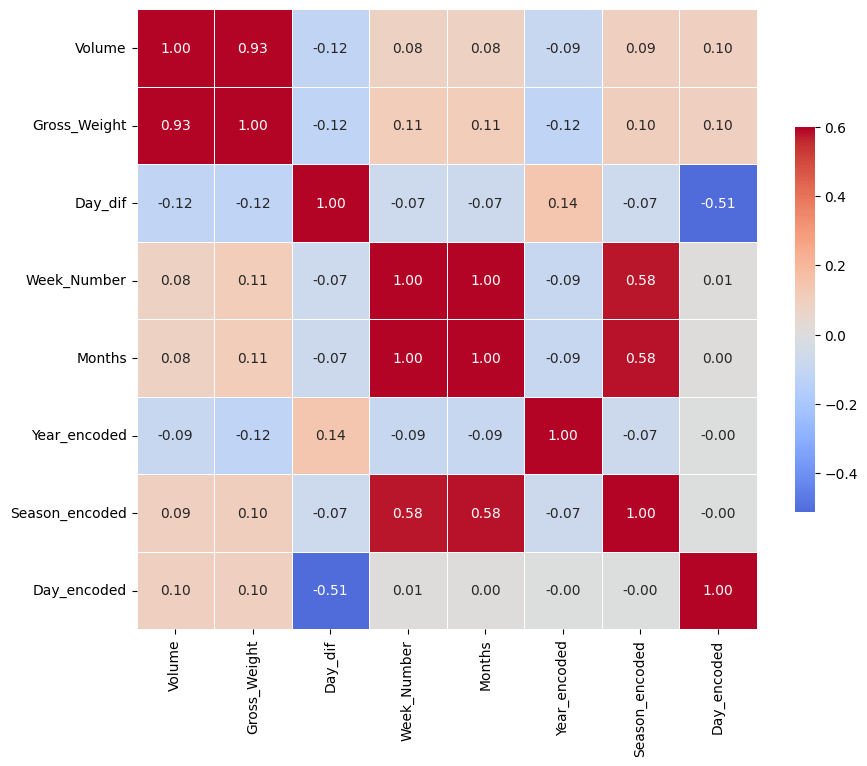

In [18]:
g = sns.heatmap(aq_corr,  vmax=.6, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
pyplot.show()

In [19]:
# standardize the dataset
#df_input=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]

#scaler= StandardScaler()
#scaler=scaler.fit(df_input)
#df_input=scaler.transform(df_input)

The'split_dataset' function returns two numpy arrays named 'train' and 'test' that include the training and testing sets of the source dataset and accepts as an argument a pandas DataFrame object called 'df_input'.  The numpy'split' function remodels the training and testing sets into equal bulks. Equal rows are present in every bulk. The'split' function divides arrays along a specified axis into several sub-arrays in this manner.


In [20]:
# split a dataset into train/test sets
def split_dataset(df_input,t):
  train, test = df_input[0:t], df_input[t:-s]

  #print("trainlen",len(train))
  #print("testlen",len(test))

  # restructure bulks equally
  # by using 'split' function, dataframe is converted to numpy array from 2d to 3d
  train = array(split(train, len(train)/bulks))
  test = array(split(test, len(test)/bulks))

  #print("train",train)
  #print("test",test) 
  return train, test

The function below compares a series of expected values against their corresponding actual values to determine how accurate the predictions are. For each day as well as the complete set of forecasted values, the Root Mean Squared Error (RMSE) is calculated.

The "actual" and "predicted" numpy arrays are inputs to the function. "actual" is a 2D array with a column for each variable and a row for each day. The shape of "actual" and "predicted" are both 2D arrays. Each component of "predicted" reflects the anticipated value for the corresponding component of "actual".

The "mean_squared_error" function from the "sklearn.metrics" library is first called to determine the RMSE for each day, and the result is squared( takes the square root). A list called "scores" contains the RMSE results for each day.

The function then determines the total RMSE for the full collection of predicted values. For this, it first adds up the squared disparities between each predicted value and its actual value, divides by the total number of items in the arrays, and so on. The overall RMSE score is determined by taking this result's square root.

The function outputs both the daily list of RMSE scores and the total RMSE.

In [21]:
# evaluate one or more forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  #print("actual",actual)
  #print("predicted",predicted)
  
  # calculate an RMSE score for each day
  for i in range(actual.shape[1]):
    # calculate mse
    mse = mean_squared_error(actual[:, i], predicted[:, i])
    #print("Actual",actual[:, i])
    #print("Predicted", predicted[:, i])

    # calculate rmse
    rmse = sqrt(mse)
    # store
    scores.append(rmse)

  # calculate overall RMSE
  s = 0
  for row in range(actual.shape[0]):
    for col in range(actual.shape[1]):
      s += (actual[row, col] - predicted[row, col])**2
  score = sqrt(s / (actual.shape[0] * actual.shape[1]))

  #print("Actul shape",actual.shape)
  #print("Actul",actual)
  #print("Predicted shape",predicted.shape)
  #print("Predicted",predicted)

  return score, scores

The RMSE scores calculated by the "evaluate_forecasts" function are summarized by this "summarise_Score" function. It accepts three arguments: "name" provides the name of the model or forecast being assessed; "score" is the total RMSE score calculated by the "evaluate_forecasts" function; and "scores" is a list of the RMSE scores calculated for each day.

Using the "mean" and "std" functions from the numpy library, the code first determines the mean and standard deviation of the list of RMSE scores. The "print" function is then used to output a summary of the findings in the format "model name: mean RMSE (+/- standard deviation)".

The "boxplot" function from the matplotlib.pyplot library is then used by the function to construct a box and whisker plot of the RMSE scores. 

In [22]:
# summarize scores
def summarize_scores(name, score, scores, cfg_list):
  # calculate mean and standard deviation of scores
  scores_m, score_std = mean(scores), std(scores)

  print('%s: %.3f RMSE (+/- %.3f) cfg_list %s' % (name, scores_m, score_std, cfg_list))
  # create tuple dictionary with summary information
  summary = {"name": name, "score_mean": (scores_m), "cfg_list": cfg_list}
  
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

  return summary

 The responsibility of the function 'to_supervised', is to take 3 arguments:

dt: 3d numpy array(time series data)

n_input: The window lenght ( number of input time steps)

n_out: the number output  time steps 

The function first flattens the input data into a 2d array. It then defines two empty lists, X and y, to hold the input/output sequences.

The flattened data array's time steps (windows) are then repeated t by the function. It specifies the output sequence's end indices (out_end) and the input sequence's start and end indices (in_start and in_end) for each time step. The input sequence (X) and the output sequence (Y) are appended to the X list and the y list, respectively, if there is enough data to create an instance with n_input input time steps and n_out output time steps.

The function then returns the input/output sequences as two numpy arrays, X and y.

In [23]:
# convert history into inputs and outputs
def to_supervised(dt, n_input, n_out=5):
  # flatten data
  data_2d = dt.reshape((dt.shape[0]*dt.shape[1], dt.shape[2]))         #2d

  #print("train.shape[0] train.shape[1] train.shape[2]",dt.shape[0], dt.shape[1], dt.shape[2])
  #print("data after flatting it",data_2d)
  #print("data_2d.shape",data_2d.shape)

  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data_2d)):
    # define the end of the input sequence. in_end and out_end indicate index number of the data
    in_end = in_start + n_input
    #print("in_end",in_end)
    out_end = in_end + n_out
    #print("out_end",out_end)
    
    # ensure we have enough data for this instance
    if out_end <= len(data_2d):
      X.append(data_2d[in_start:in_end, :])      #take all features
      y.append(data_2d[in_end:out_end, 0])       #take only the first column of the dataset as a target feature
    # move along one time step
    in_start += 1
  
  #print("array(X)", array(X))
  #print("array(y)", array(y))
  #print("array(X).shape", array(X).shape)
  #print("array(y).shape", array(y).shape)
  
  return array(X), array(y)

The following code defines the build_model function, which accepts three arguments:

 Train: 3d Numpy array is used to represent training time series data.

Test: 3d Numpy array for testing time series data .

n_input:The number of time steps to be used as input 

To create input/output sequences from the training and testing data, which are then saved in the train_x, train_y, test_x, and test_y variables, the function first calls the to_supervised function.

The model's training parameters for verbose, epochs, and batch_size are then defined, along with a number of time steps (n_timesteps), features (n_features), and outputs (n_outputs) for the input and output sequences.

To match the predicted form of the model output, the function reshapes the train_y array to have a shape of (number of samples, n_outputs, 1).

The Keras API is then used by the function to define a sequential model. The model is composed of two TimeDistributed dense layers with 100 and 1 units each, an LSTM layer with 200 units, a RepeatVector layer to repeat the output of the LSTM layer n_outputs times, another LSTM layer with 200 units that returns sequences, and mean squared error (MSE) loss and the Adam optimizer.

When the validation loss stops improving, the function utilizes early stopping to halt training and applies the fit method to fit the model to the training data.
(The pd.date_range() function generates dates in sequences using the last date as a guide in test_date, the number of future dates we want to forecast is n_future, to determine the daily frequency at which we want to generate dates we use freq='1d')

The function returns the trained model, train_x, and train_y.



In [24]:
# train the model
def build_model(train, test, cfg_list, test_date):
  n_input, n_nodes_Conv, n_epochs, n_batch, patience, min_delta, n_nodes_LSTM=cfg_list

  # prepare data
  train_x, train_y = to_supervised(train, n_input)    # array(X)==> 3d, array(y)==> 2d which comes to here

  # Here train_x is 3d but train_y is 2d but LSTMs  work with 3d data
  #print("train_x",train_x)
  #print("train_y",train_y)
  #print("test",test)
  #print("test",test.shape)

  test_x, test_y= to_supervised(test, n_input)       # array(X)==> 3d, array(y)==> 2d which come to here
  #print("test_x.shape[0]",test_x.shape[0])
  #print("test_x.shape[1]",test_x.shape[1])
  #print("test_x.shape[2]",test_x.shape[2])
  #print("test_x",test_x)
  #print("test_y",test_y)
  #print("test_x.shape",test_x.shape)
  #print("test_y.shape",test_y.shape)
  
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  
  # reshape output into [samples, timesteps, features]
  # Here train_y converted from 2d to 3d before implementation of LSTM algorithm
  train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
  #print("train_y.shape[0]",train_y.shape[0])
  #print("train_y.shape[1]",train_y.shape[1])

  #print("train_x",train_x)
  #print("train_y",train_y)
  #print("train_x.shape",train_x.shape)
  #print("train_y.shape",train_y.shape)
  
  # define model
  model = Sequential()
  model.add(Conv1D(n_nodes_Conv, 1, activation='relu', input_shape=(n_timesteps,n_features)))
  model.add(Conv1D(n_nodes_Conv, 1, activation='relu'))
  model.add(MaxPooling1D(pool_size=1))
  model.add(Flatten())
  model.add(RepeatVector(n_outputs))
  model.add(LSTM(n_nodes_LSTM, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(100, activation='relu')))
  model.add(TimeDistributed(Dense(1)))
  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae', 'mape'])

  # fit network
  # Early Stopping
  early_stopping = EarlyStopping(patience=patience,min_delta=min_delta,monitor="val_loss",restore_best_weights=True)
  model_history= model.fit(train_x, train_y, shuffle=False, epochs=n_epochs, validation_data=(test_x, test_y), batch_size=n_batch, verbose=0, callbacks=[early_stopping])

  # plot metrics
  pyplot.plot(model_history.history['mse'],label='mean_squared_error')
  pyplot.plot(model_history.history['mae'],label='mean_absolute_error')
  pyplot.xlabel('epocs', fontsize=20)
  pyplot.ylabel('loss', fontsize=20)
  pyplot.legend()
  pyplot.show()

  # plot loss during training
  fig = pyplot.figure(figsize=(8, 4))
  pyplot.title('Model Loss')
  pyplot.plot(model_history.history['loss'], label='Train Loss')
  pyplot.plot(model_history.history['val_loss'], label='Test/Validation Loss')
  pyplot.xlabel('epocs', fontsize=20)
  pyplot.ylabel('loss', fontsize=20)
  pyplot.legend()
  pyplot.show()

  # print the model summary
  model.summary()
  return model, train_x, train_y, test_x

Description:

model: ML model to make predictions

history: model input that consist of a list of historical data(input for the model)

n_input: number of past time steps used as input to the model

The function retrieves the most recent n_input time steps as the forecast's input data after first flattening the history data into a 2D array. After that, the input data is reshaped into a 3D array with the shape [1, n_input, n], where n is the total number of features in the data. Based on the input data, the model is used to forecast the output values for the following time step. 

In [25]:
# make a forecast
def forecast(model, history, n_input):
  #print("data history",history)
  #print("data history shape",len(history))
  
  # flatten data
  data = array(history)      
  #print("history",data)
  data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))  #2d
  #print("Flattened data",data)
  
  # retrieve last observations for input data
  input_x = data[-n_input:, :]         
  # reshape into [1, n_input, n]
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  #print("BEFORE model",input_x)
  #print("BEFORE model shape",input_x.shape)
  
  # forecast
  yhat = model.predict(input_x, verbose=0)
  #print("yhat",yhat)
  # we only want the vector forecast
  yhat = yhat[0]
  
  return yhat

train: 3D numpy array of historical training data

test: 3D numpy array of historical test data

n_input: the number of past time steps used as input to the model

The function calls the build_model function and passes the train, test, and n_input arguments before creating a machine learning model. The train data is then used to initialize the history variable. The code then executes a walk-forward validation while iterating through each week of the test data. Using the forecast function, which accepts the machine learning model, the historical data, and the n_input argument, it forecasts the target variable. Each week's predicted target variable is kept in the predictions list, and each week's actual observation is added to the history variable to predict the following week.  

Once all predictions are completed , the function calls the evaluate_forecasts function and passes the true test data and forecasted predictions data in order to assess the quality of the predictions. In addition to the expected predictions and historical data, the function also provides a score and a list of scores for each week along with future predictions and historical data



In [26]:
# evaluate the model
def evaluate_model(train, test, cfg_list, test_date):
  n_input, n_nodes_Conv, n_epochs, n_batch, patience, min_delta, n_nodes_LSTM=cfg_list
  
  # fit model
  model, train_x, train_y, test_x= build_model(train,test,cfg_list,test_date)
  #print("train_x, train_y", len(train_x), len(train_y))

  # history is a list of data.
  #print("train len",len(train))
  #print("ttrain shape",train.shape)
  #print("test len",len(test))
  history = [x for x in train]
  #print("history_begining",history)          #this history variable includes only train
  #print("history_begining len",len(history))  

  # walk-forward validation
  test_history= list()
  test_predictions = list()
  for i in range(len(test)):
    test_history.append(test[i, :])
    # prediction
    yhat_sequence = forecast(model, test_history, n_input)    #predicted target variables
    # store the predictions
    test_predictions.append(yhat_sequence)
  
  test_predictions = array(test_predictions)

  predicted_test_1d=list()
  for i in test_predictions:
    predicted_test_1d.extend(i)

  score, scores = evaluate_forecasts(test[:, :, 0], test_predictions)

  # Dimension of the prediction variable is reduced from 2d to 1d
  test_1d=test[:,:,0]

  actual_1d=list()
  for i in test_1d:
    actual_1d.extend(i)
  
  #print("actual",actual_1d)
  #print("predicted_test_1d",predicted_test_1d)

  # Generate list of sequence of days for predictions of future. Weekdays are generated only. 'B' represents the business days
  n_future=10
  forecast_period_dates=pd.date_range(list(test_date)[-1],periods=n_future,freq='B').tolist()
  # Extracting only the date part using the `date()` method
  forecast_period_dates = [d.date() for d in forecast_period_dates]
  #print("datelist_future_",forecast_period_dates)
  
  # future forecast
  future_forecast=model.predict(test_x[-2:])
  # flatten the array to remove extra dimensions
  future_forecast = future_forecast.flatten()

  #forecast=model.predict(test_x[-n_future:])
  print("future_forecast",future_forecast)

  print("predicted_test_1d len",len(predicted_test_1d))
  print("Actual len",len(actual_1d))

  # plotting
  plt.figure(figsize=(10, 4))
  plt.title("Actual-Predicted")
  plt.xlabel("Records")
  plt.ylabel("Volume (M3)")
  plt.plot(test_date,actual_1d, label='Actual Test Data', color ="green")
  plt.plot(test_date,predicted_test_1d, label='Predictions', color ="red")
  #plt.plot(num_dates,future_forecast, label='Future Predictions', color ="blue")
  days = ['1st', '2nd', '3rd', '4th', '5th','6st', '7nd', '8th', '9th', '10th']
  x= [i for i in days]
  plt.plot(x, future_forecast, label='Future Predictions', color ="blue")

  plt.legend()
  plt.show()

  return score, scores, predicted_test_1d, model, cfg_list

In [27]:
# create a list of configs to tune hyperparameter
def model_configs():
  # define scope of configs
  n_input = [3,5]
  n_nodes_Conv = [32,64]
  n_epochs = [100]
  n_batch = [16,32]
  patience= [5, 10]
  min_delta= [0.001, 0.0001]
  n_nodes_LSTM = [100,200]
  # create configs
  configs = list()
  for i in n_input:
    for j in n_nodes_Conv:
      for k in n_epochs:
        for l in n_batch:
          for m in patience:
            for n in min_delta:
              for o in n_nodes_LSTM:
                cfg = [i, j, k, l, m, n, o]
                configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs

In [28]:
# split dataset into standard bulks
# 0.20-testing dataset, 0.80-training dataset 
p=0.20
bulks=5  #in every bulk 5 sample will be stored
n=int(len(df_input)-len(df_input)*p)
k=int(n%bulks)      #remaining
t=n-k       #training dataset reach until this place
s=int(len(df_input)-t)%bulks        #last remanining
  
# take 'Date' column
train, test = df_input[0:t], df_input[t:-s]
test_date=test['Date']
#print("test_date",test_date)

# eliminate the 'Date' column
df_input=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]

# split into train and test
train, test = split_dataset(df_input,t)

# model configs
cfg_lists = model_configs()

#idetify one empty tuple
results=()
# evaluate model and get scores
for cfg_list in cfg_lists:
  score, scores, predicted_1d, model, cfg_list= evaluate_model(train, test, cfg_list, test_date)

  # summarize scores
  summary=summarize_scores('CNN-LSTM', score, scores, cfg_list)
  
  # add summary variable values to the tuple
  results += (summary,)

  # plot scores
  days = ['1st', '2nd', '3rd', '4th', '5th']   #the size of the bulks which we mentioned while spliting the dataset at the begining and the the day numbers should be equal
  fig = pyplot.figure(figsize=(6, 4))
  pyplot.bar(days, scores, width=0.3, label='LSTM')
  # Add labels and title
  plt.xlabel('Days')
  plt.ylabel('RMSE Scores')
  plt.title('RMSE per Day')
  pyplot.show()

sorted_summaries=sorted(results, key=lambda x: x["score_mean"])
for i, summary in enumerate(sorted_summaries):
  print(summary)

Output hidden; open in https://colab.research.google.com to view.